## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

**Exploring dataframe**

In [37]:
import pandas as pd
data=pd.read_csv('salaries.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


**Let's search the 5 job titles with the highest average salary in USD**

In [38]:
job_salary = data.groupby("job_title")["salary_in_usd"].mean()
job_salary = job_salary.sort_values(ascending=False).head(5)
job_salary=job_salary.to_frame().reset_index()
job_salary

,job_title,salary_in_usd
0,Analytics Engineering Manager,399880.000000
1,Data Science Tech Lead,375000.000000
2,Applied AI ML Lead,292500.000000
3,Head of Machine Learning,288701.000000
4,Engineering Manager,262525.615672


**Let's create the horizontal bar with the information above**

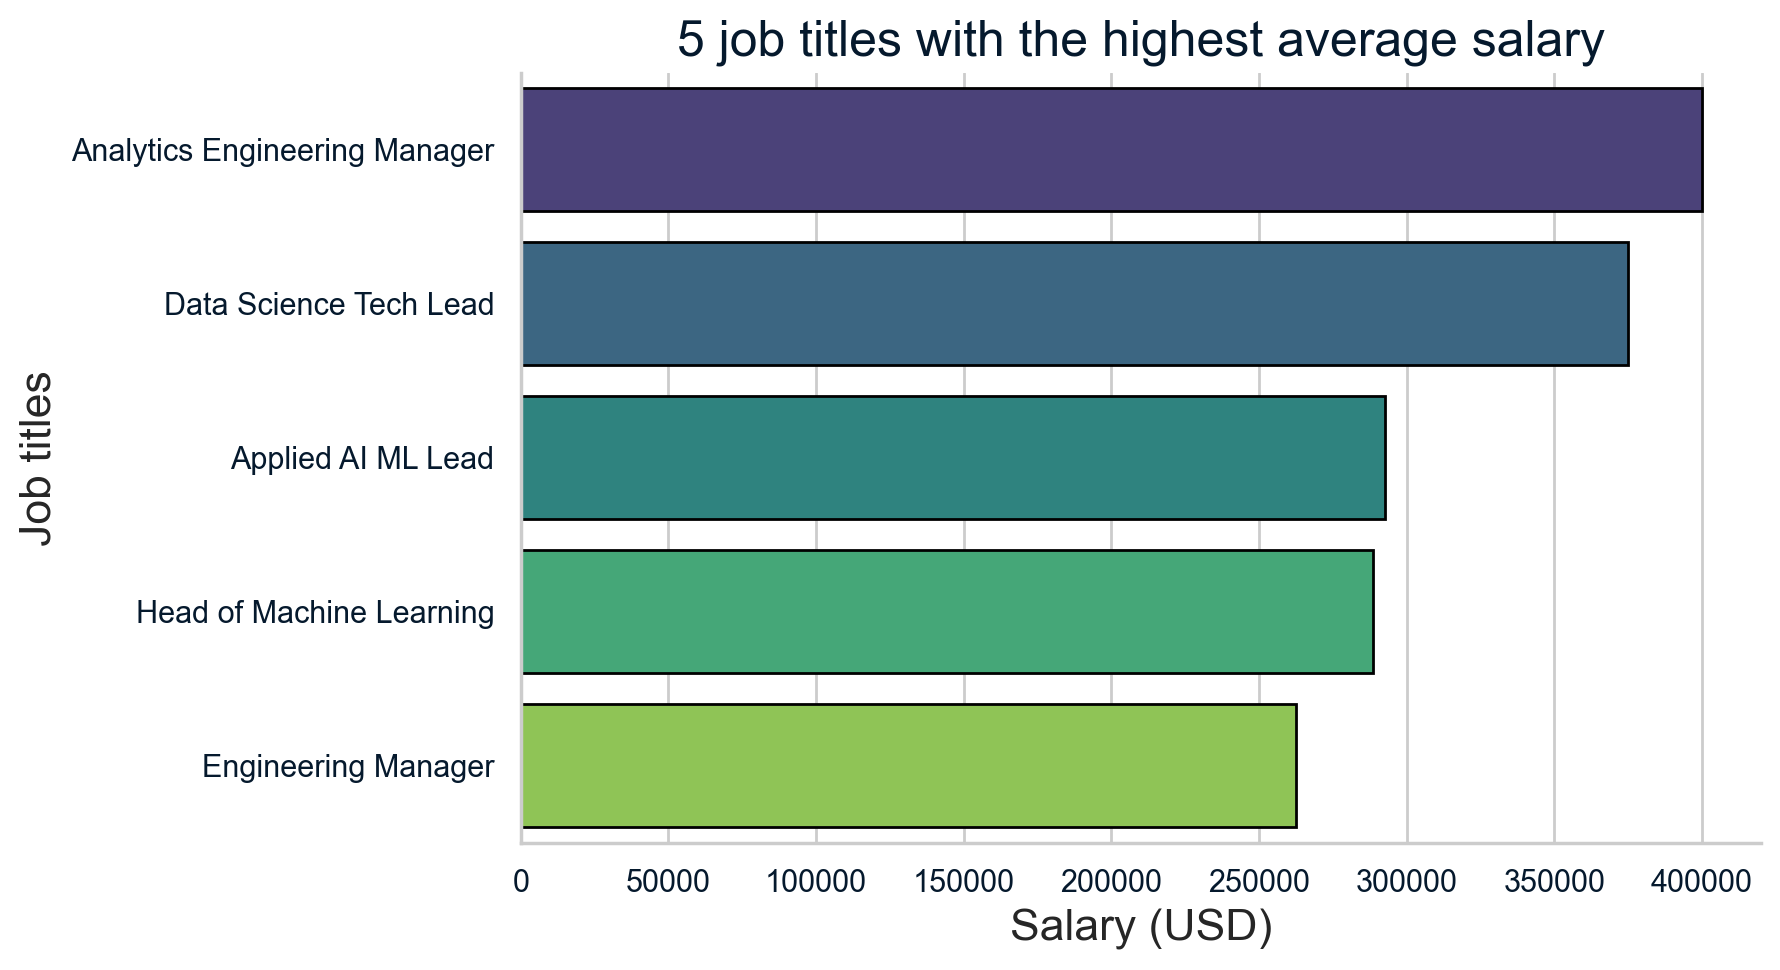

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.barplot(y="job_title", x="salary_in_usd", data=job_salary, palette="viridis", edgecolor="black")

plt.title('5 job titles with the highest average salary', fontsize=18)
plt.xlabel('Salary (USD)', fontsize=16)
plt.ylabel('Job titles', fontsize=16)

sns.despine()
plt.show()

**Comparing the average salaries for employees working remotely 100%, 50%, and 0%**

- 0: No remote work (<20%)
- 50: Hybrid (50%)
- 100: Fully remote (>80%)

In [40]:
avg_salaries = data.groupby("remote_ratio")["salary_in_usd"].mean().round(2)
avg_sal = avg_salaries.reset_index().sort_values(by='salary_in_usd', ascending=False, ignore_index=True)
avg_sal


,remote_ratio,salary_in_usd
0,0,162401.77
1,100,149675.07
2,50,81866.87


The results indicate that employees who do not work remotely earn a higher average salary compared to those who work fully remote or in a hybrid setting. Among remote workers, those who are fully remote earn more on average than those who work in a hybrid remote environment.

Let's visualise the salary distribution (in USD) across company sizes (S, M, L) and find out which company size offers the highest average salary


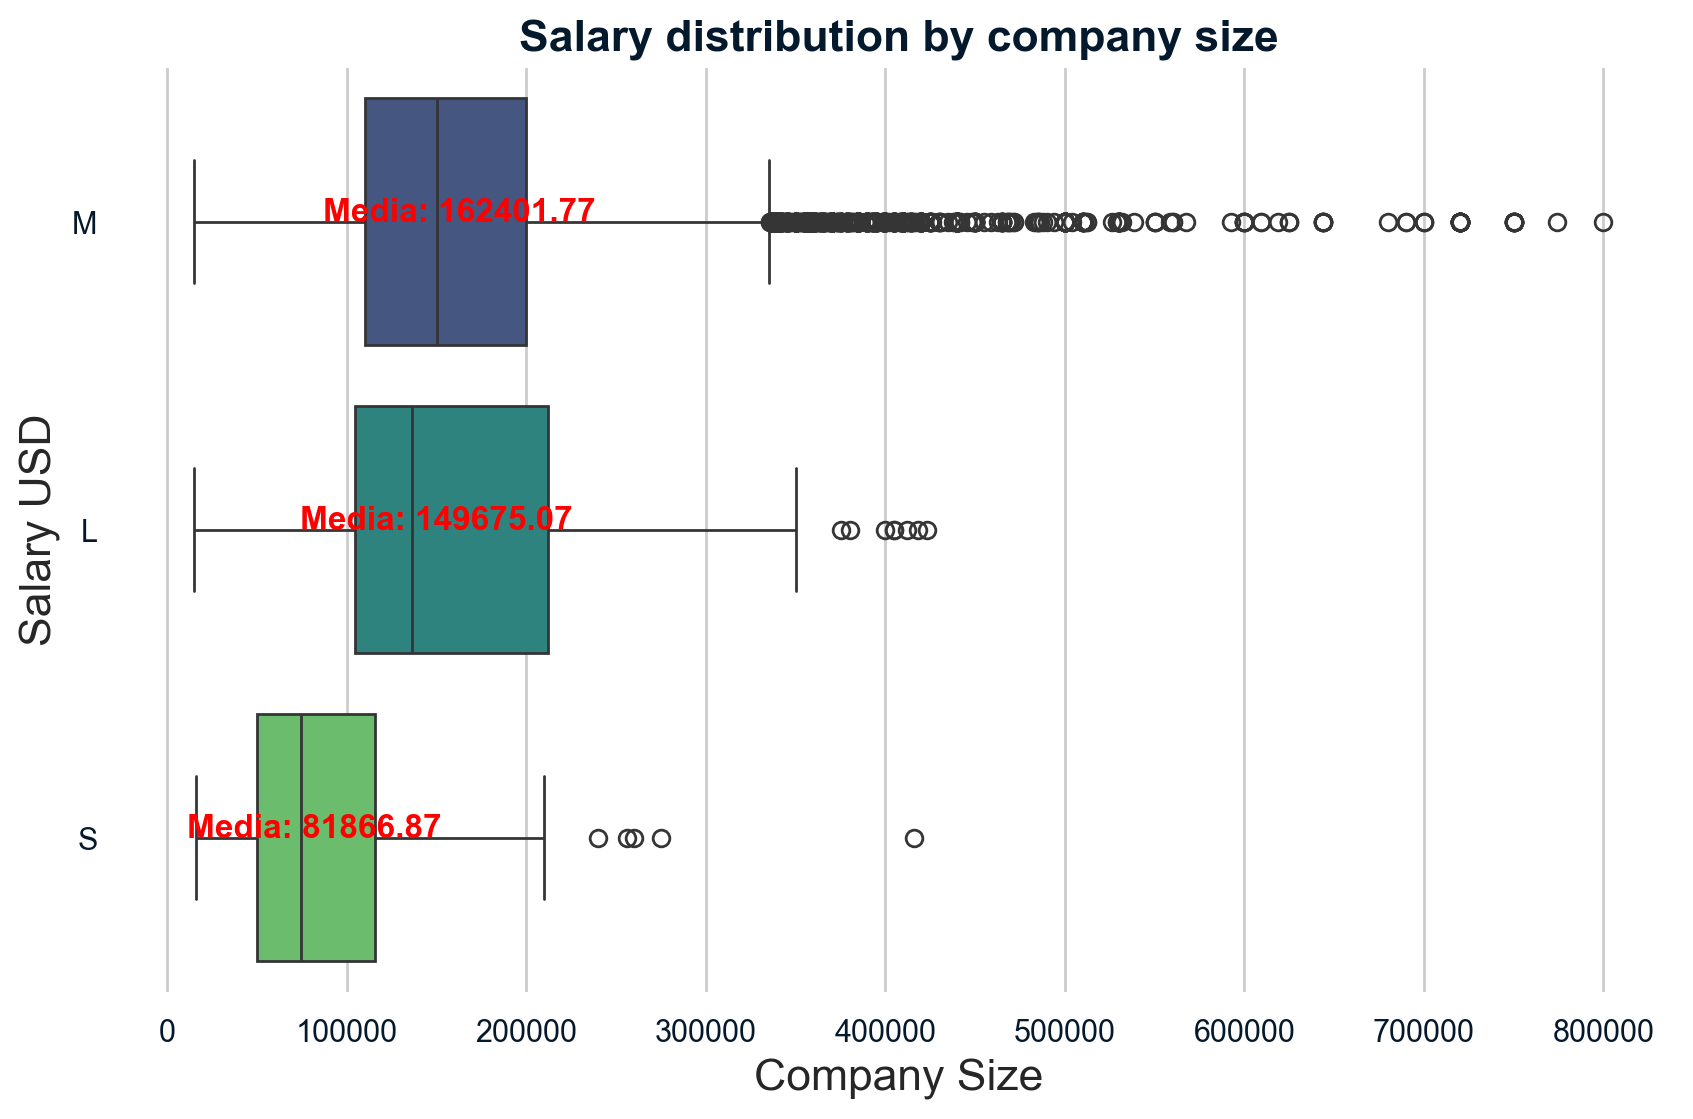

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette for the plot
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a boxplot with the specified data and palette
sns.boxplot(data=data, y="company_size", x="salary_in_usd", palette='viridis')

# Iterate over the rows of avg_sal to add text annotations
for i, row in avg_sal.iterrows():
    plt.text(row['salary_in_usd'], i, f'Media: {row["salary_in_usd"]:.2f}', 
             horizontalalignment='center', fontweight='bold', color='red')

# Show the plot
plt.title("Salary distribution by company size", fontsize=16, fontweight='bold')
plt.xlabel("Company Size", fontsize=16)
plt.ylabel("Salary USD", fontsize=16)

sns.despine(left=True, bottom=True)

plt.show()

**- Conclusions and Discussion:**

From the graph above, it seems that medium-size (M) companies seem to offer the highest average salaries compared to small and large companies.
Large (L) companies show a wider box, indicating greater salary variation while M and S companies have a norrower distribution.
Medium companies (M) have a significant number of right-side outliers, indicating the presence of extremely high salaries. Outliers in L and S companies are smaller
The distribution in L, M and S companies seems to be positively skewed.

Medium-sized companies tend to offer higher average salaries than both small and large companies, although their distribution shows quite a few high outliers.